In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load and prepare the data
llama_data = pd.read_json("/Users/ilyaskussanov/Documents/GitHub/Financial_Sentiment_LLM/03_Sentiment_Analysis/LLama/output_results_final.json")
llama_data = llama_data.transpose()
llama_data_columns_filtered = llama_data.iloc[:, :6]

CATEGORIES = [
    "Finance",
    "Production",
    "Reserves / Exploration / Acquisitions / Mergers / Divestments",
    "Environment / Regulatory / Geopolitics",
    "Alternative Energy / Lower Carbon",
    "Oil Price / Natural Gas Price / Gasoline Price"
]

llama_data_columns_filtered.columns = CATEGORIES

# Replace errors with NaN
llama_data_columns_filtered = llama_data_columns_filtered.replace(
    to_replace='No valid JSON output found after 5 attempts.', 
    value=np.nan
)

# Replace "Mixed" with "Neutral" in the entire DataFrame
llama_data_columns_filtered = llama_data_columns_filtered.replace('Mixed', 'Neutral')

# Filter rows without NaN
rows_without_nan = llama_data_columns_filtered.dropna()

# Count positive, negative, neutral in rows_without_nan across each column
sentiment_counts = rows_without_nan.apply(pd.Series.value_counts).fillna(0)




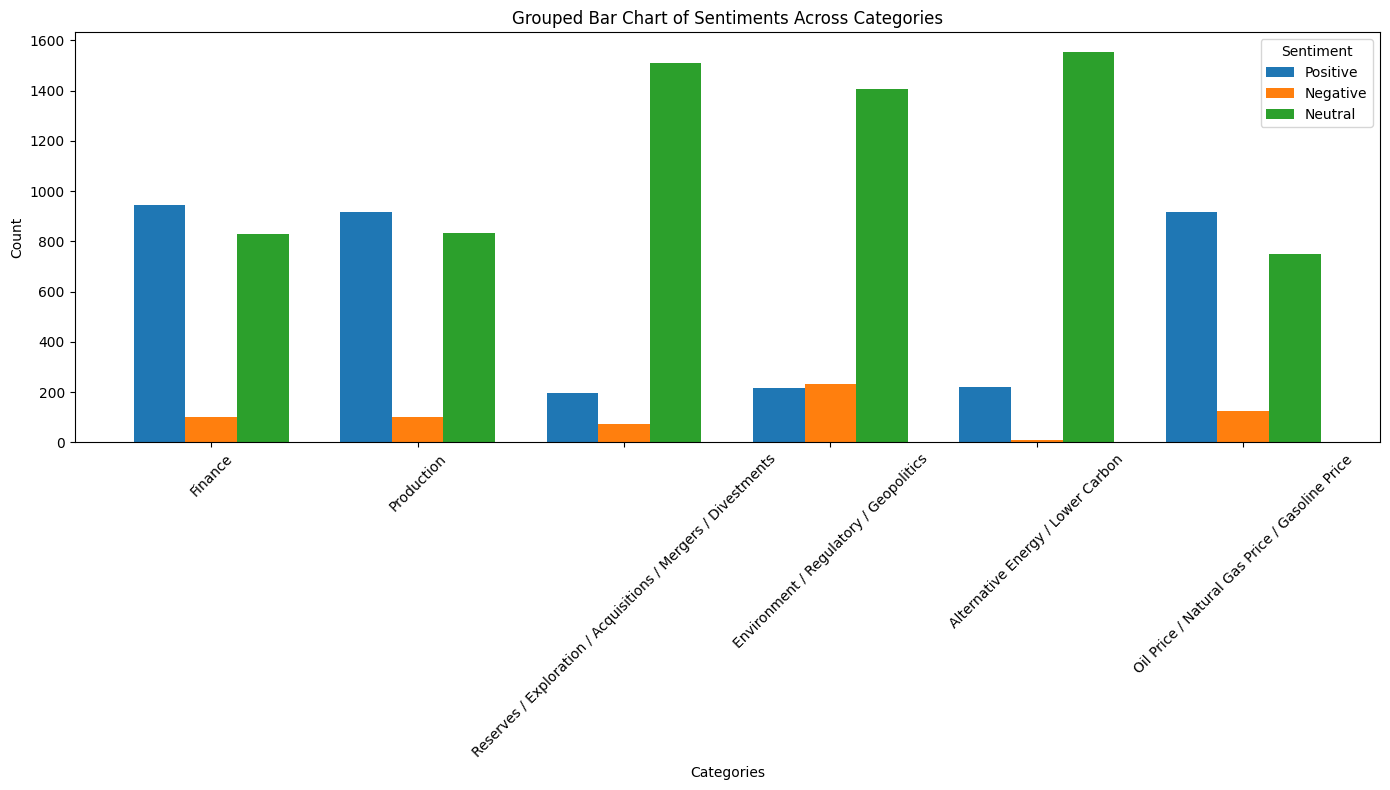

In [25]:
# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(14, 8))

sentiments = ['Positive', 'Negative', 'Neutral']
bar_width = 0.25
index = np.arange(len(sentiment_counts.columns))

for i, sentiment in enumerate(sentiments):
    ax.bar(index + i * bar_width, sentiment_counts.loc[sentiment], bar_width, label=sentiment)

ax.set_xlabel('Categories')
ax.set_ylabel('Count')
ax.set_title('Grouped Bar Chart of Sentiments Across Categories')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(sentiment_counts.columns, rotation=45)
ax.legend(title='Sentiment')

plt.tight_layout()
plt.show()

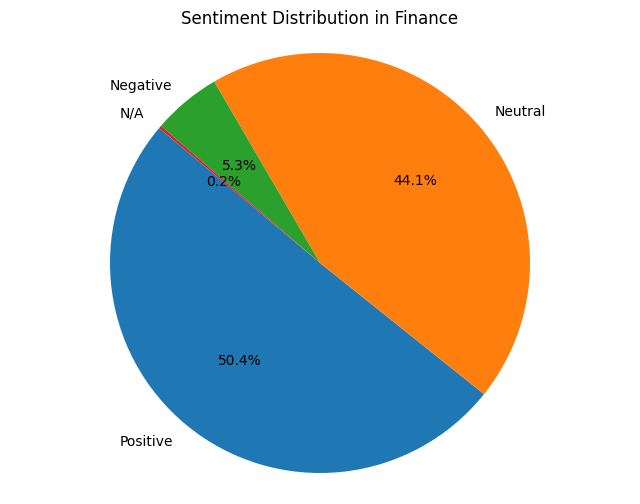

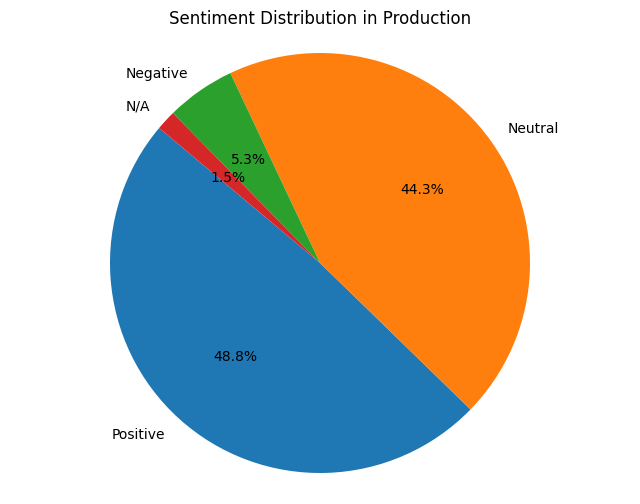

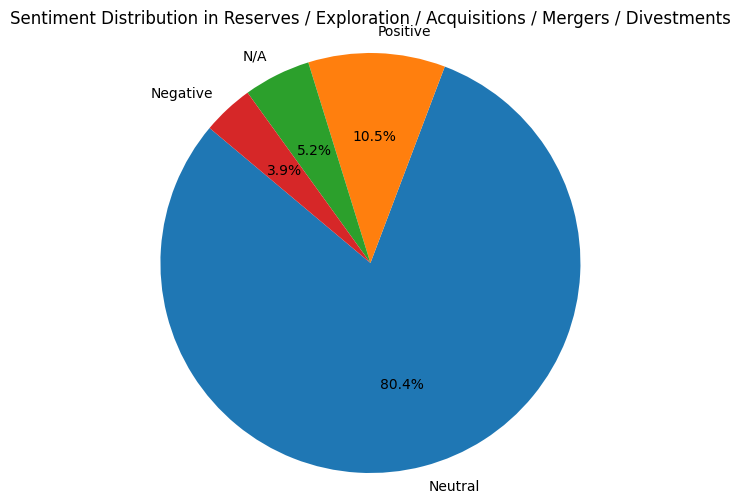

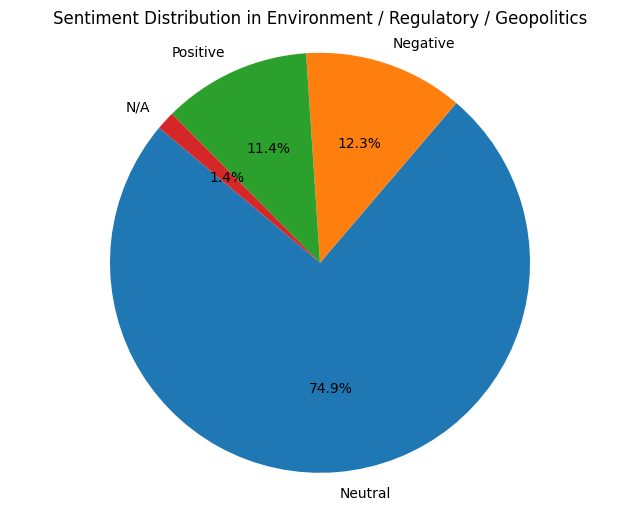

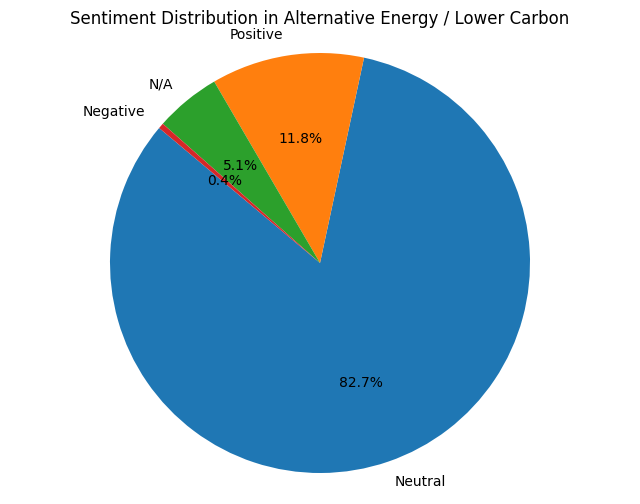

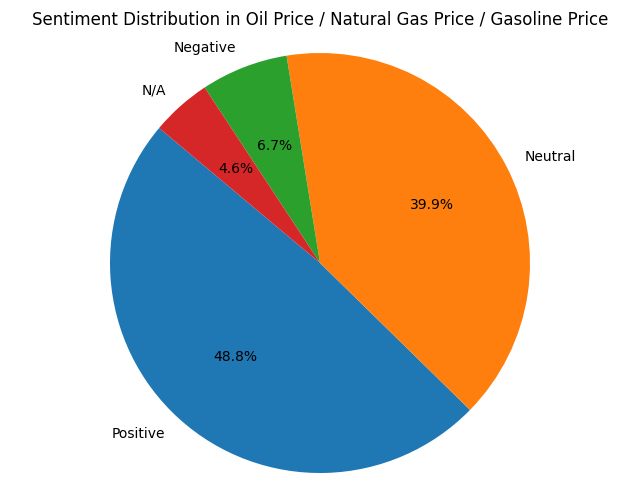

In [26]:
for category in CATEGORIES:
    sentiment_distribution = rows_without_nan[category].value_counts()
    plt.figure(figsize=(8, 6))
    plt.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Sentiment Distribution in {category}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()


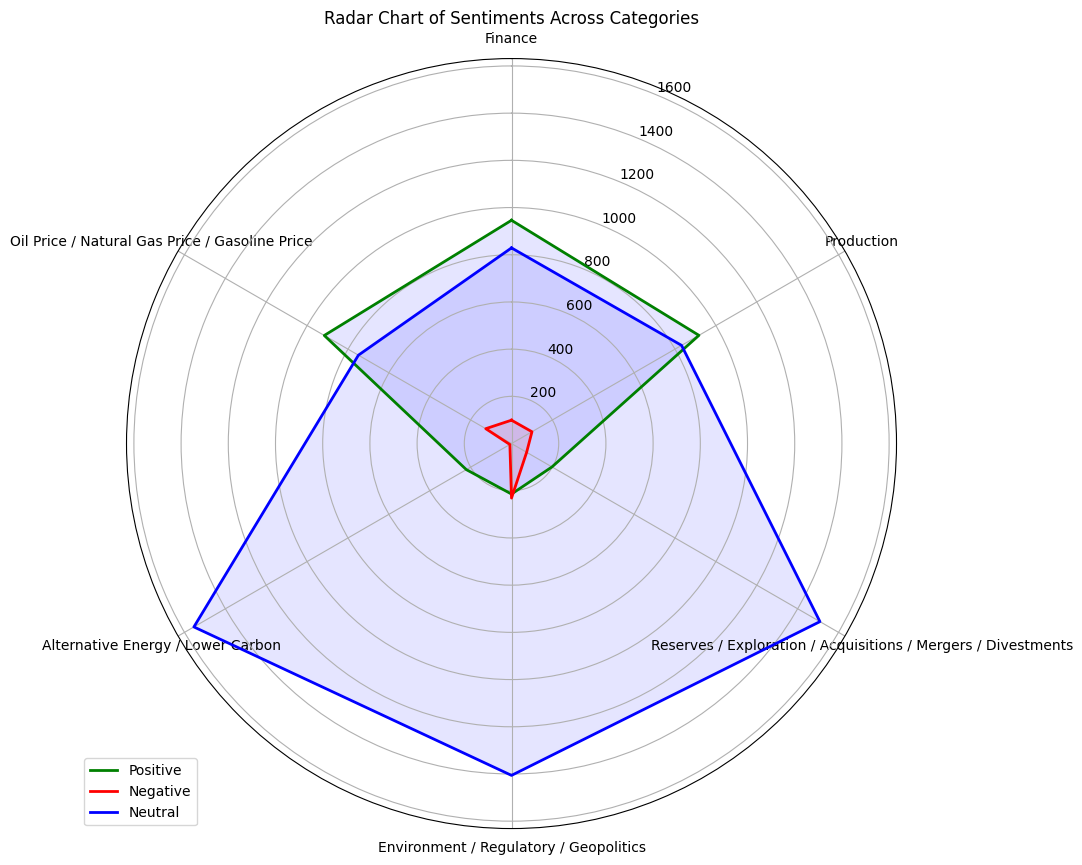

In [27]:
from math import pi

# Data preparation
categories = list(sentiment_counts.columns)
N = len(categories)

# Repeat the first value to close the circle
values_positive = sentiment_counts.loc['Positive'].tolist() + [sentiment_counts.loc['Positive'][0]]
values_negative = sentiment_counts.loc['Negative'].tolist() + [sentiment_counts.loc['Negative'][0]]
values_neutral = sentiment_counts.loc['Neutral'].tolist() + [sentiment_counts.loc['Neutral'][0]]

# What will be the angle of each axis in the plot?
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

plt.xticks(angles[:-1], categories)

# Draw one axe per variable and add labels
ax.plot(angles, values_positive, linewidth=2, linestyle='solid', label='Positive', color='green')
ax.fill(angles, values_positive, 'b', alpha=0.1)

ax.plot(angles, values_negative, linewidth=2, linestyle='solid', label='Negative', color='red')
ax.fill(angles, values_negative, 'r', alpha=0.1)

ax.plot(angles, values_neutral, linewidth=2, linestyle='solid', label='Neutral', color='blue')
ax.fill(angles, values_neutral, 'b', alpha=0.1)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Radar Chart of Sentiments Across Categories')
plt.show()


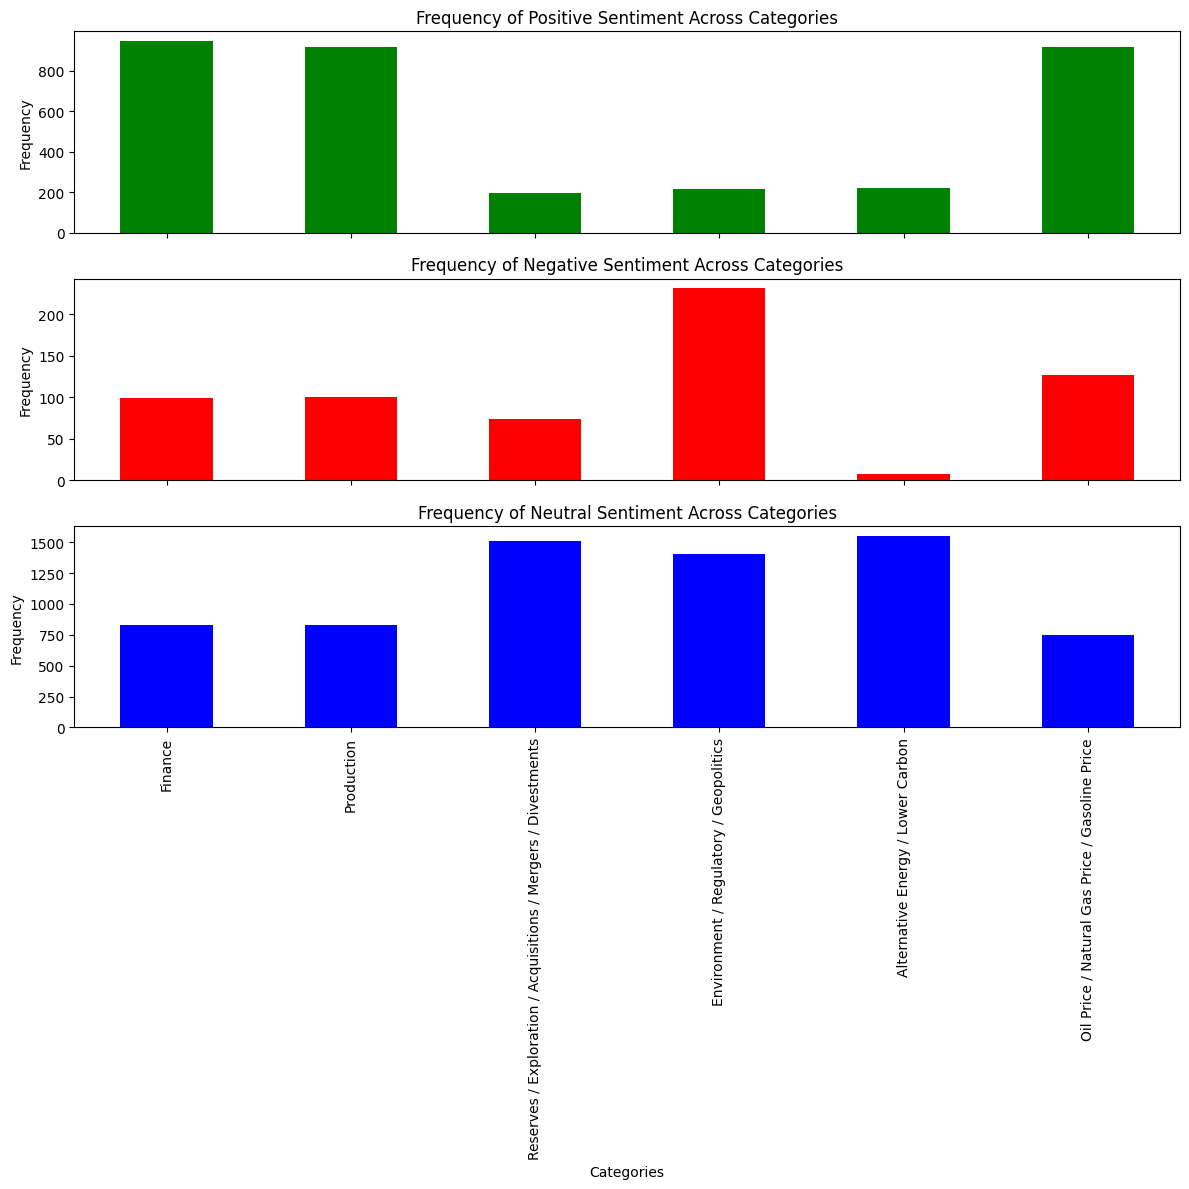

In [28]:
# Creating a histogram for each sentiment
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

sentiments = ['Positive', 'Negative', 'Neutral']
for ax, sentiment in zip(axes, sentiments):
    sentiment_counts.T[sentiment].plot(kind='bar', ax=ax, color='blue' if sentiment == 'Neutral' else ('green' if sentiment == 'Positive' else 'red'))
    ax.set_title(f'Frequency of {sentiment} Sentiment Across Categories')
    ax.set_xlabel('Categories')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


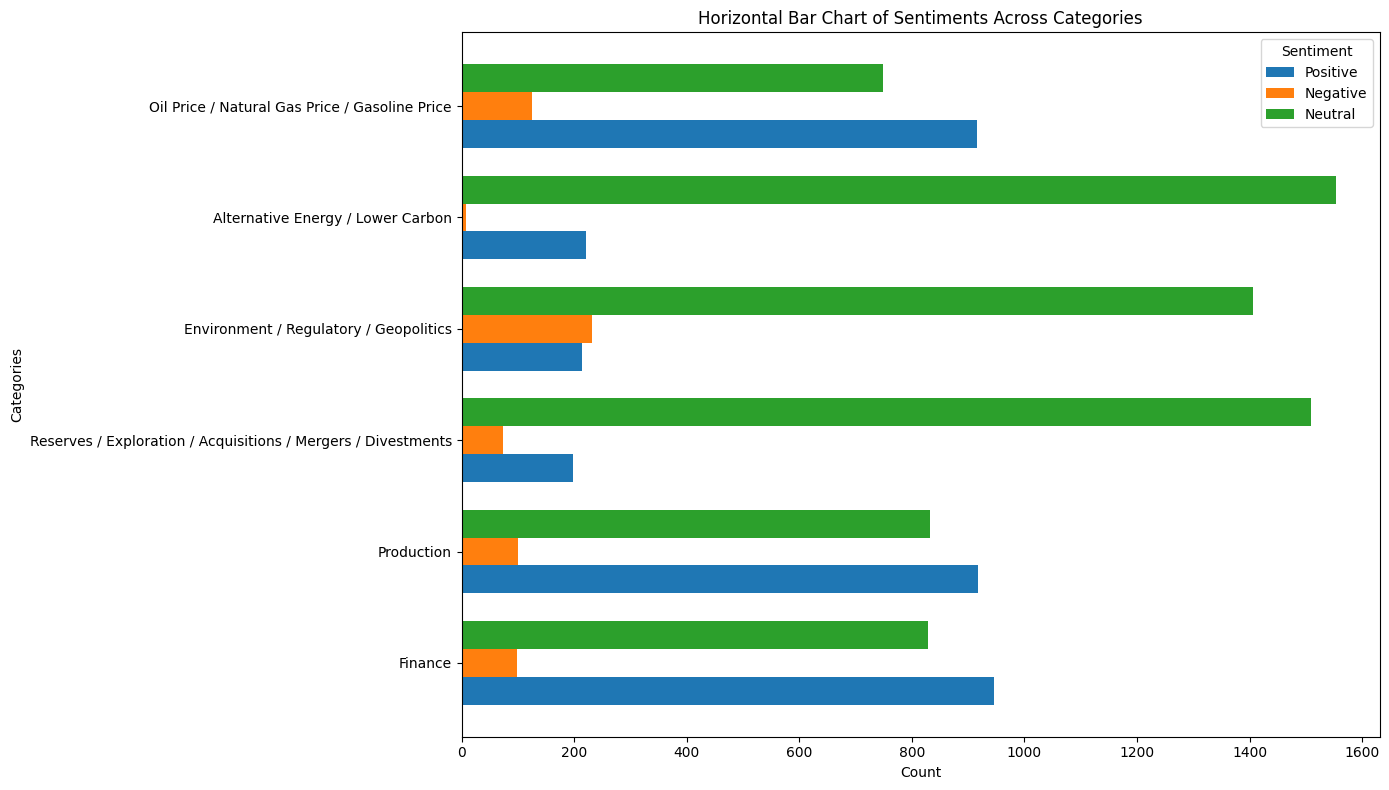

In [29]:
# Plot horizontal bar chart
fig, ax = plt.subplots(figsize=(14, 8))

sentiments = ['Positive', 'Negative', 'Neutral']
bar_width = 0.25
index = np.arange(len(sentiment_counts.columns))

for i, sentiment in enumerate(sentiments):
    ax.barh(index + i * bar_width, sentiment_counts.loc[sentiment], bar_width, label=sentiment)

ax.set_ylabel('Categories')
ax.set_xlabel('Count')
ax.set_title('Horizontal Bar Chart of Sentiments Across Categories')
ax.set_yticks(index + bar_width)
ax.set_yticklabels(sentiment_counts.columns)
ax.legend(title='Sentiment')

plt.tight_layout()
plt.show()


In [30]:
llama_data_columns_filtered

,Finance,Production,Reserves / Exploration / Acquisitions / Mergers / Divestments,Environment / Regulatory / Geopolitics,Alternative Energy / Lower Carbon,Oil Price / Natural Gas Price / Gasoline Price
PQ-2703147472,Neutral,Neutral,Neutral,Negative,Neutral,Neutral
PQ-2702197510,Positive,Positive,Neutral,Neutral,Neutral,Positive
PQ-2697049245,Neutral,Negative,Neutral,Neutral,Neutral,Negative
PQ-2696371267,Positive,Positive,Neutral,Neutral,Neutral,Positive
PQ-2695835797,Positive,Positive,Neutral,Neutral,Neutral,Positive
...,...,...,...,...,...,...
PQ-2238653651,NaN,NaN,NaN,NaN,NaN,NaN
PQ-2239478009,NaN,NaN,NaN,NaN,NaN,NaN
PQ-2238860015,NaN,NaN,NaN,NaN,NaN,NaN
PQ-2233473767,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
rows_without_nan

,Finance,Production,Reserves / Exploration / Acquisitions / Mergers / Divestments,Environment / Regulatory / Geopolitics,Alternative Energy / Lower Carbon,Oil Price / Natural Gas Price / Gasoline Price
PQ-2703147472,Neutral,Neutral,Neutral,Negative,Neutral,Neutral
PQ-2702197510,Positive,Positive,Neutral,Neutral,Neutral,Positive
PQ-2697049245,Neutral,Negative,Neutral,Neutral,Neutral,Negative
PQ-2696371267,Positive,Positive,Neutral,Neutral,Neutral,Positive
PQ-2695835797,Positive,Positive,Neutral,Neutral,Neutral,Positive
...,...,...,...,...,...,...
PQ-2307913171,Neutral,Neutral,Neutral,Negative,Neutral,Neutral
PQ-2303767584,Neutral,Neutral,Neutral,Positive,Neutral,Neutral
PQ-2399785661,Neutral,Neutral,N/A,N/A,N/A,N/A
PQ-2254974522,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral


In [32]:
missing_values = rows_without_nan.isnull().sum()
print(missing_values)

Finance                                                          0
Production                                                       0
Reserves / Exploration / Acquisitions / Mergers / Divestments    0
Environment / Regulatory / Geopolitics                           0
Alternative Energy / Lower Carbon                                0
Oil Price / Natural Gas Price / Gasoline Price                   0
dtype: int64


In [33]:
rows_without_nan.to_csv('proquest_filtered_data.csv', index=False)

In [34]:
df= pd.read_csv('proquest_filtered_data.csv')

In [35]:
check_is_null=df.isnull().sum()


In [36]:
df

,Finance,Production,Reserves / Exploration / Acquisitions / Mergers / Divestments,Environment / Regulatory / Geopolitics,Alternative Energy / Lower Carbon,Oil Price / Natural Gas Price / Gasoline Price
0,Neutral,Neutral,Neutral,Negative,Neutral,Neutral
1,Positive,Positive,Neutral,Neutral,Neutral,Positive
2,Neutral,Negative,Neutral,Neutral,Neutral,Negative
3,Positive,Positive,Neutral,Neutral,Neutral,Positive
4,Positive,Positive,Neutral,Neutral,Neutral,Positive
...,...,...,...,...,...,...
1873,Neutral,Neutral,Neutral,Negative,Neutral,Neutral
1874,Neutral,Neutral,Neutral,Positive,Neutral,Neutral
1875,Neutral,Neutral,NaN,NaN,NaN,NaN
1876,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral


In [37]:
df = df.fillna('Neutral')
df

,Finance,Production,Reserves / Exploration / Acquisitions / Mergers / Divestments,Environment / Regulatory / Geopolitics,Alternative Energy / Lower Carbon,Oil Price / Natural Gas Price / Gasoline Price
0,Neutral,Neutral,Neutral,Negative,Neutral,Neutral
1,Positive,Positive,Neutral,Neutral,Neutral,Positive
2,Neutral,Negative,Neutral,Neutral,Neutral,Negative
3,Positive,Positive,Neutral,Neutral,Neutral,Positive
4,Positive,Positive,Neutral,Neutral,Neutral,Positive
...,...,...,...,...,...,...
1873,Neutral,Neutral,Neutral,Negative,Neutral,Neutral
1874,Neutral,Neutral,Neutral,Positive,Neutral,Neutral
1875,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral
1876,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral


In [38]:
check_is_null=df.isnull().sum()
check_is_null

Finance                                                          0
Production                                                       0
Reserves / Exploration / Acquisitions / Mergers / Divestments    0
Environment / Regulatory / Geopolitics                           0
Alternative Energy / Lower Carbon                                0
Oil Price / Natural Gas Price / Gasoline Price                   0
dtype: int64

In [39]:
df.to_csv('proquest_filtered_data_1.csv', index=False)